# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

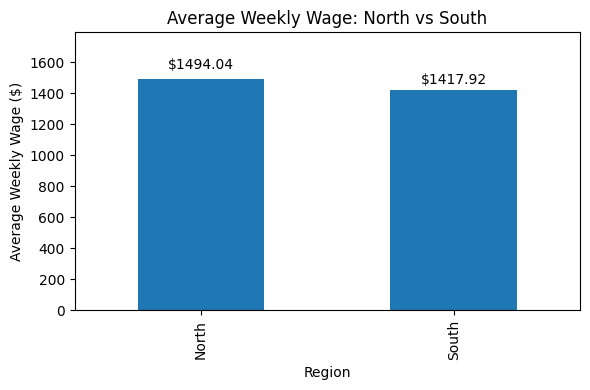

In [ ]:
#Input Data
data = { "State": ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware",
              "District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas",
              "Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi",
              "Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
              "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island",
              "South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington",
              "West Virginia","Wisconsin","Wyoming"],

    "AverageWeeklyWage": [1245,1452,1431,1236,1905,1681,1980,1535,2606,1456,1491,1363,1178,1662,1323,1253,
                          1246,1213,1227,1283,1634,2107,1391,1570,1018,1310,1189,1231,1359,1606,1815,1203,
                          2213,1467,1302,1361,1186,1420,1500,1429,1247,1163,1364,1587,1365,1280,1605,1935,
                          1149,1305,1216]
         }

df = pd.DataFrame(data)

#Organize states into North or South
south_states = set(["California","Arizona","New Mexico","Texas","Oklahoma","Arkansas","Louisiana","Mississippi","Alabama",
    "Georgia","Florida","South Carolina","North Carolina","Tennessee","Kentucky","Virginia","West Virginia",
    "Maryland","Delaware","District of Columbia","Missouri","Kansas","Nevada","Hawaii","Utah"])

df["Region"] = df["State"].apply(lambda x: "South" if x in south_states else "North")

#Calculate average wages
region_avgs = df.groupby("Region")["AverageWeeklyWage"].mean()

#Plot
plt.figure(figsize=(6,4))
ax = region_avgs.plot(kind="bar")
plt.ylabel("Average Weekly Wage ($)")
plt.title("Average Weekly Wage: North vs South")

#Add total average on top of the bars
for i, (region, value) in enumerate(region_avgs.items()):
    offset = 20
    if region == "North":
        offset = 40
    ax.text(i, value + offset, f'${value:.2f}', color='black', ha='center', va='bottom')

#Increase y-axis limit to create more room for labels
max_wage = region_avgs.max()
plt.ylim(0, max_wage * 1.2)

plt.tight_layout()
plt.show()

In [ ]:
#Binary variable: 1 = South, 0 = North
df["South"] = df["State"].apply(lambda x: 1 if x in south_states else 0)

#Regression
X = sm.add_constant(df["South"])
y = df["AverageWeeklyWage"]

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      AverageWeeklyWage   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7891
Date:                Fri, 12 Dec 2025   Prob (F-statistic):              0.379
Time:                        05:52:54   Log-Likelihood:                -363.23
No. Observations:                  51   AIC:                             730.5
Df Residuals:                      49   BIC:                             734.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1494.0385     59.993     24.904      0.0

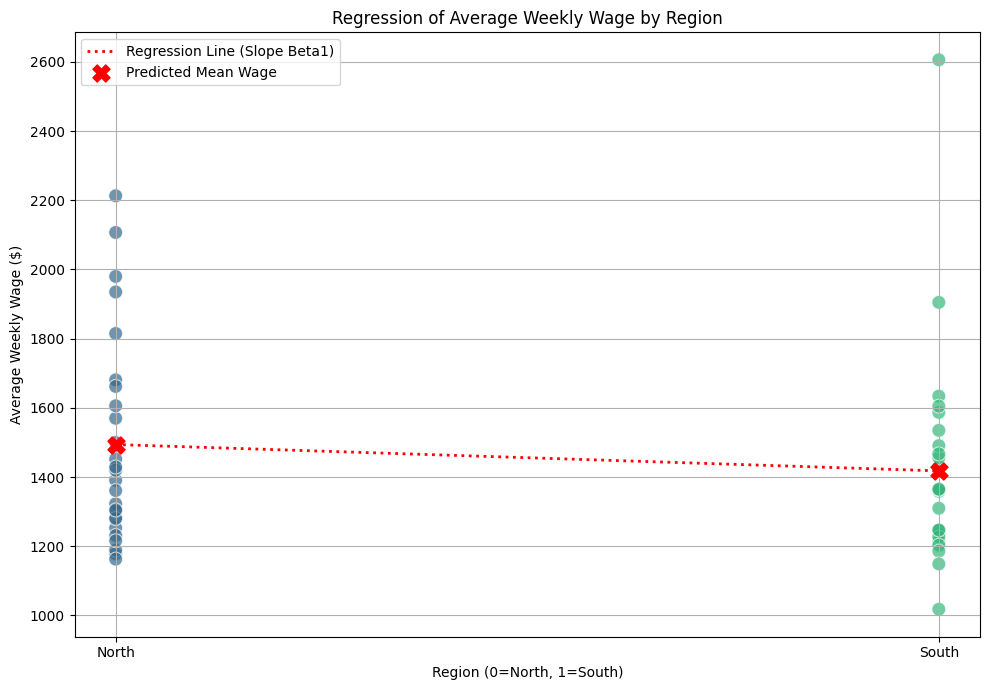

In [ ]:
#Get the regression coefficients
intercept = model.params['const']
south_effect = model.params['South']

#Create the plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='South', y='AverageWeeklyWage', data=df, s=100, hue='South', palette='viridis', legend=False, alpha=0.7)

#Plot the regression line
plt.plot([0, 1], [intercept, intercept + south_effect], color='red', linestyle=':', linewidth=2, label='Regression Line (Slope Beta1)')

#Add predicted points for clarity
plt.scatter([0, 1], [intercept, intercept + south_effect], color='red', marker='X', s=150, zorder=5, label='Predicted Mean Wage')


plt.xticks([0, 1], ['North', 'South'])
plt.xlabel('Region (0=North, 1=South)')
plt.ylabel('Average Weekly Wage ($)')
plt.title('Regression of Average Weekly Wage by Region')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()